In [ ]:
# rf = Roboflow(api_key="cEYkch18yM6B8mdIyrDA")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [ ]:
# ultralytics  and roboflow are the companies that have acquired yolov8

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 282MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 80.3MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 174.9ms
Speed: 14.8ms preprocess, 174.9ms inference, 1542.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


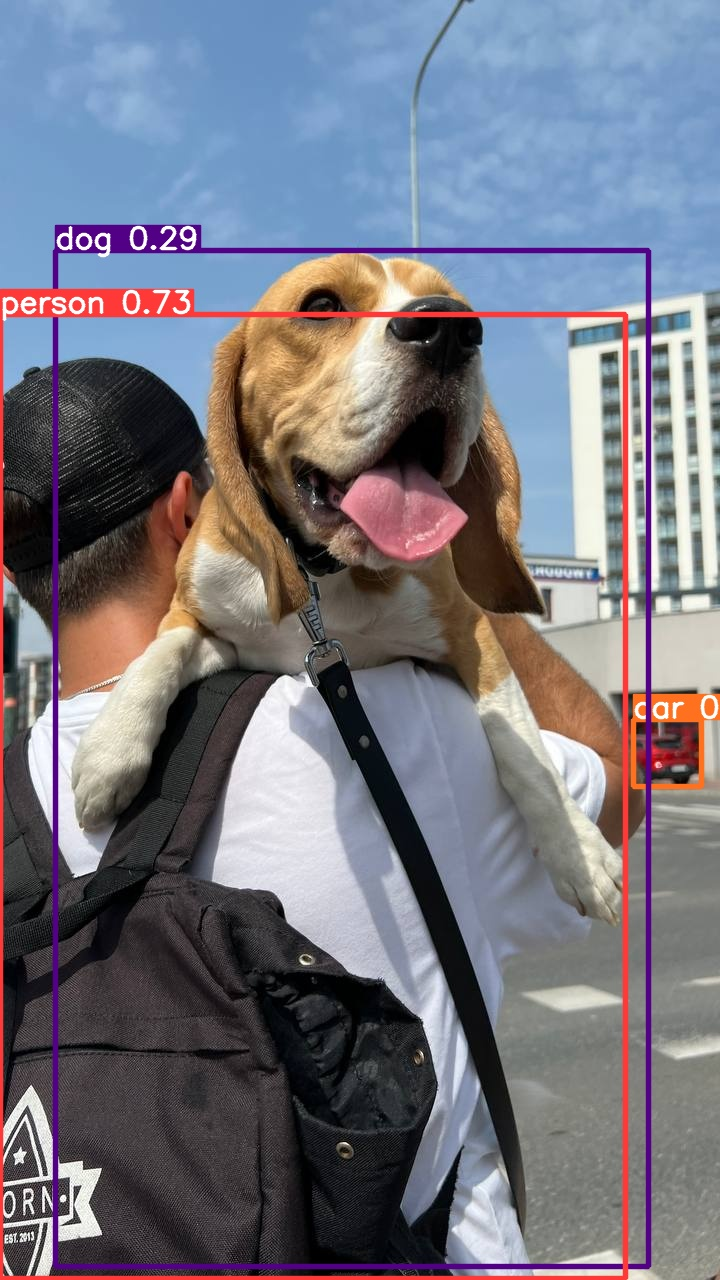

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# **LOADING OUR DATA**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="cEYkch18yM6B8mdIyrDA")
project = rf.workspace("cnn-6zehd").project("helmet-detection-h9aau")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detection-1 in yolov8:: 100%|██████████| 780/780 [00:00<00:00, 3763.91it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 339MB/s]
New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Helmet-Detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch801.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch802.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1715837739.7bade49402be.6176.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch800.jpg


/content


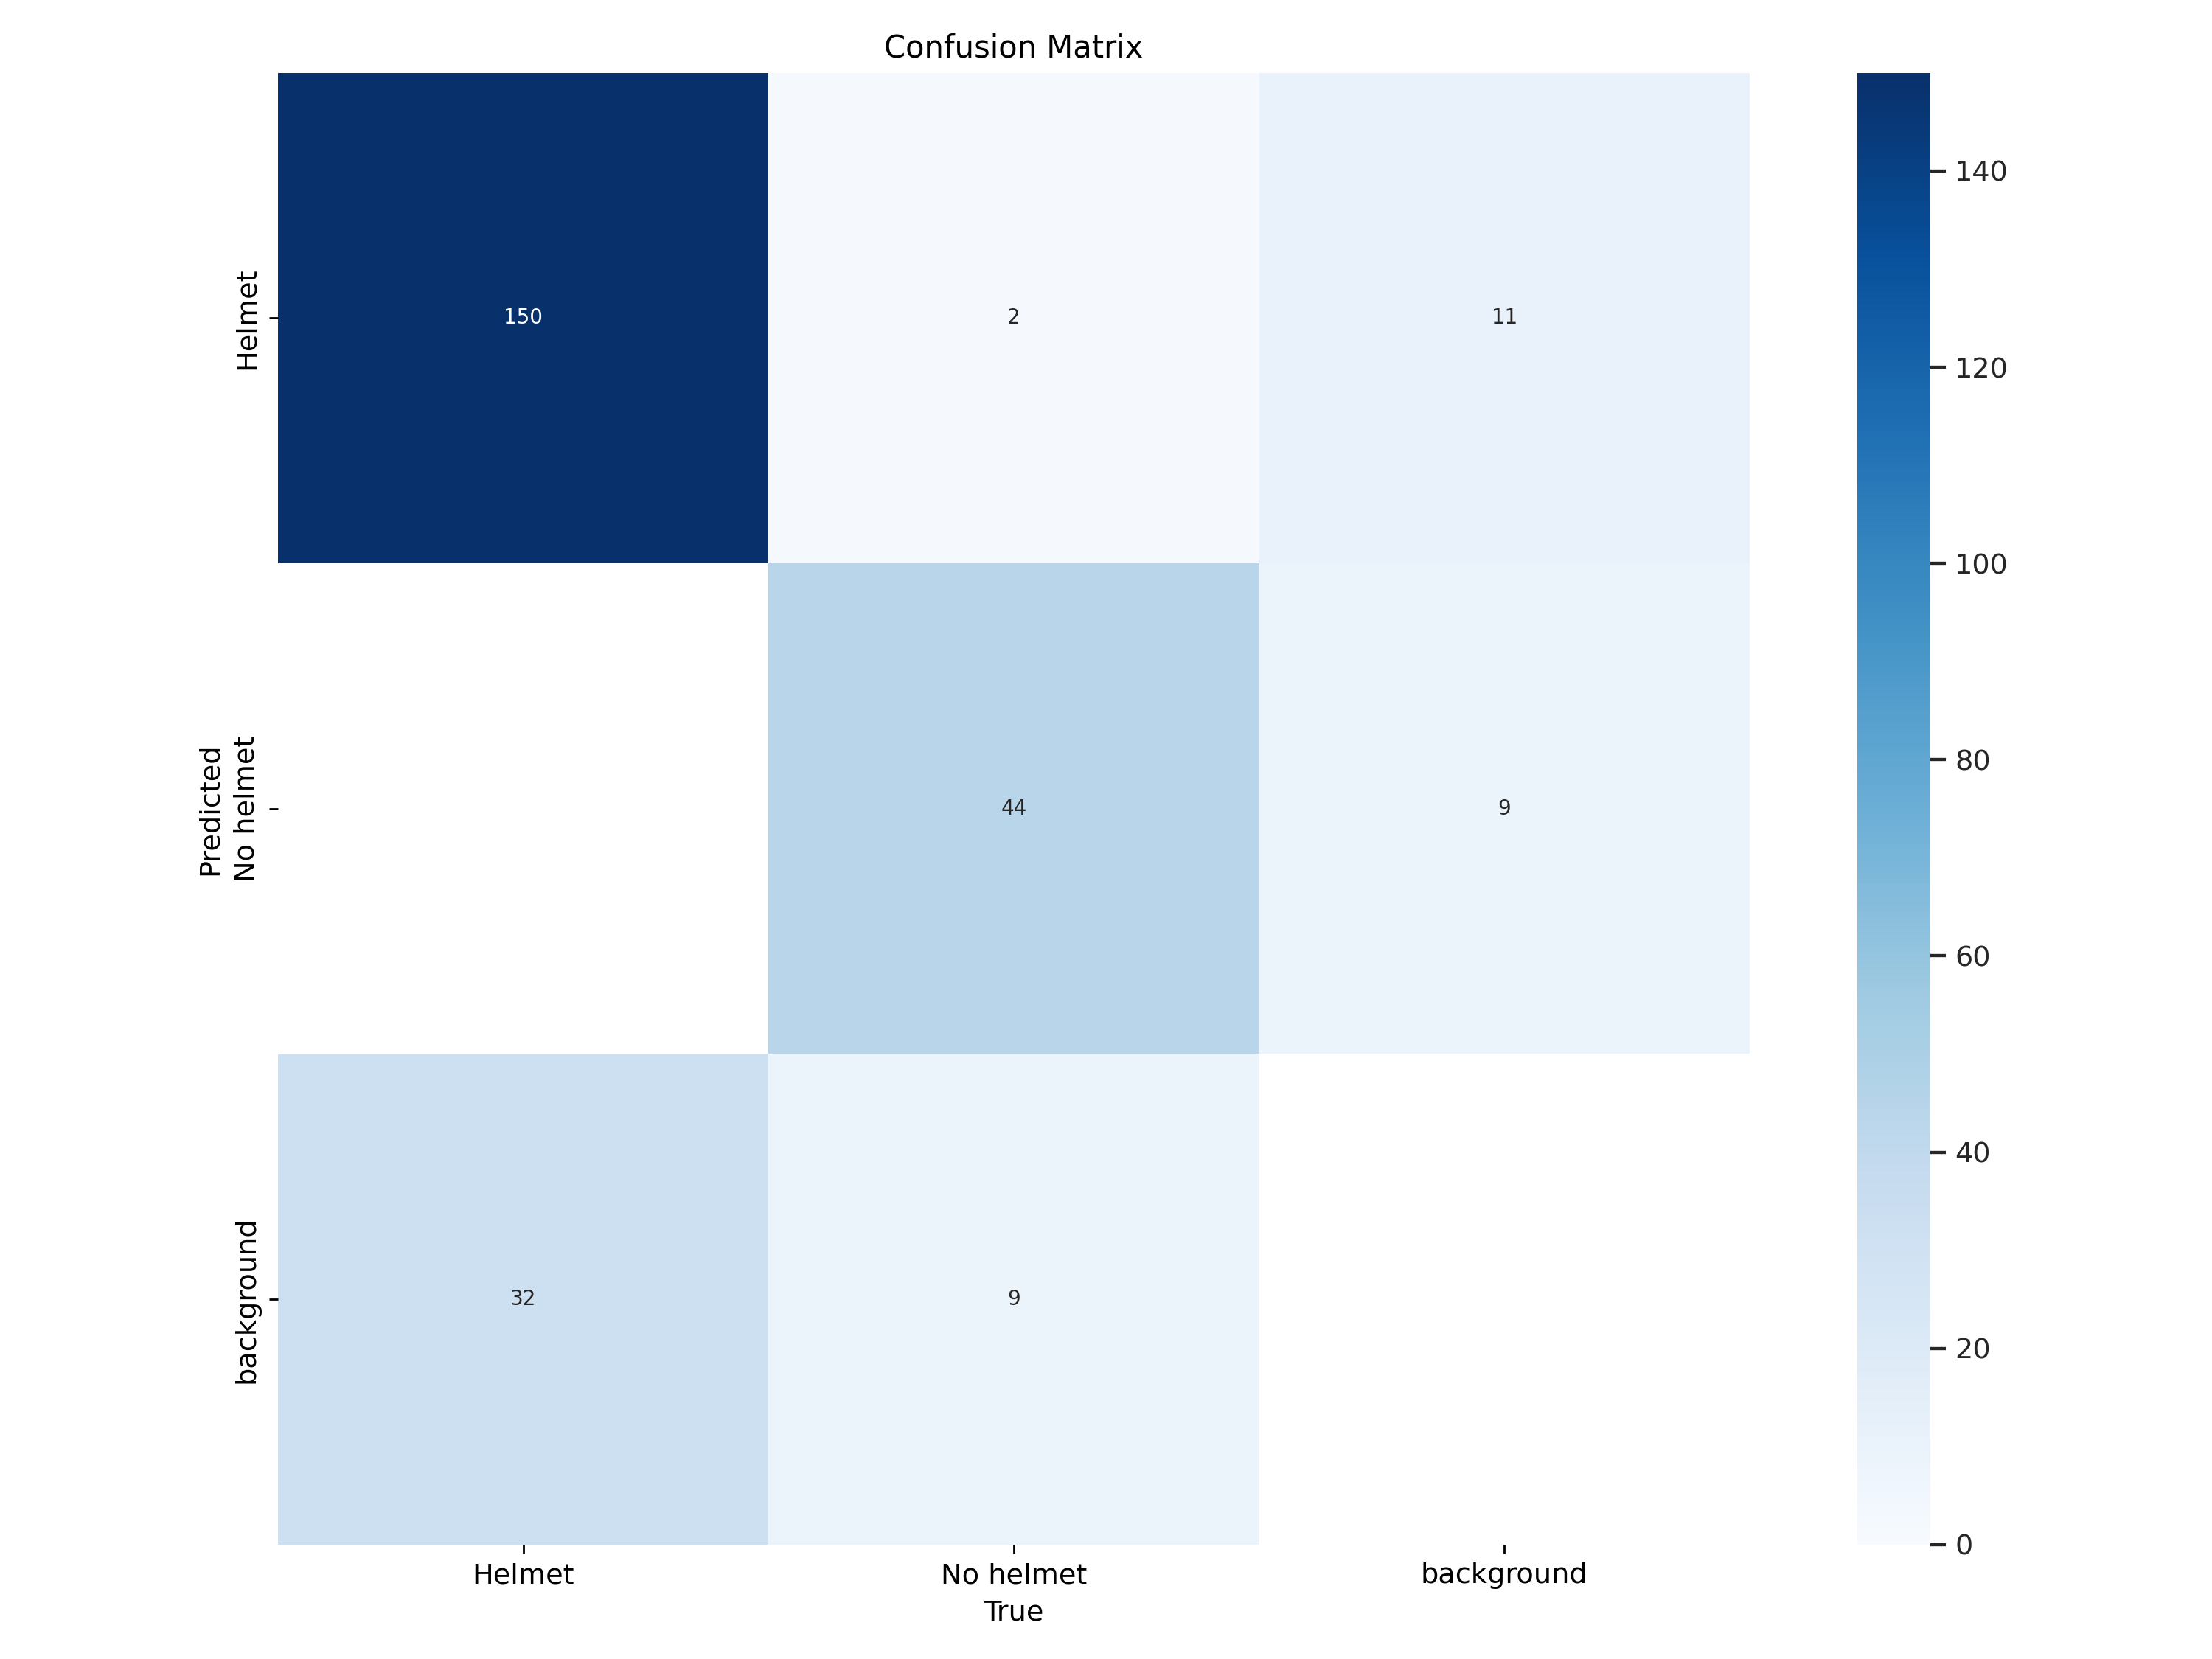

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


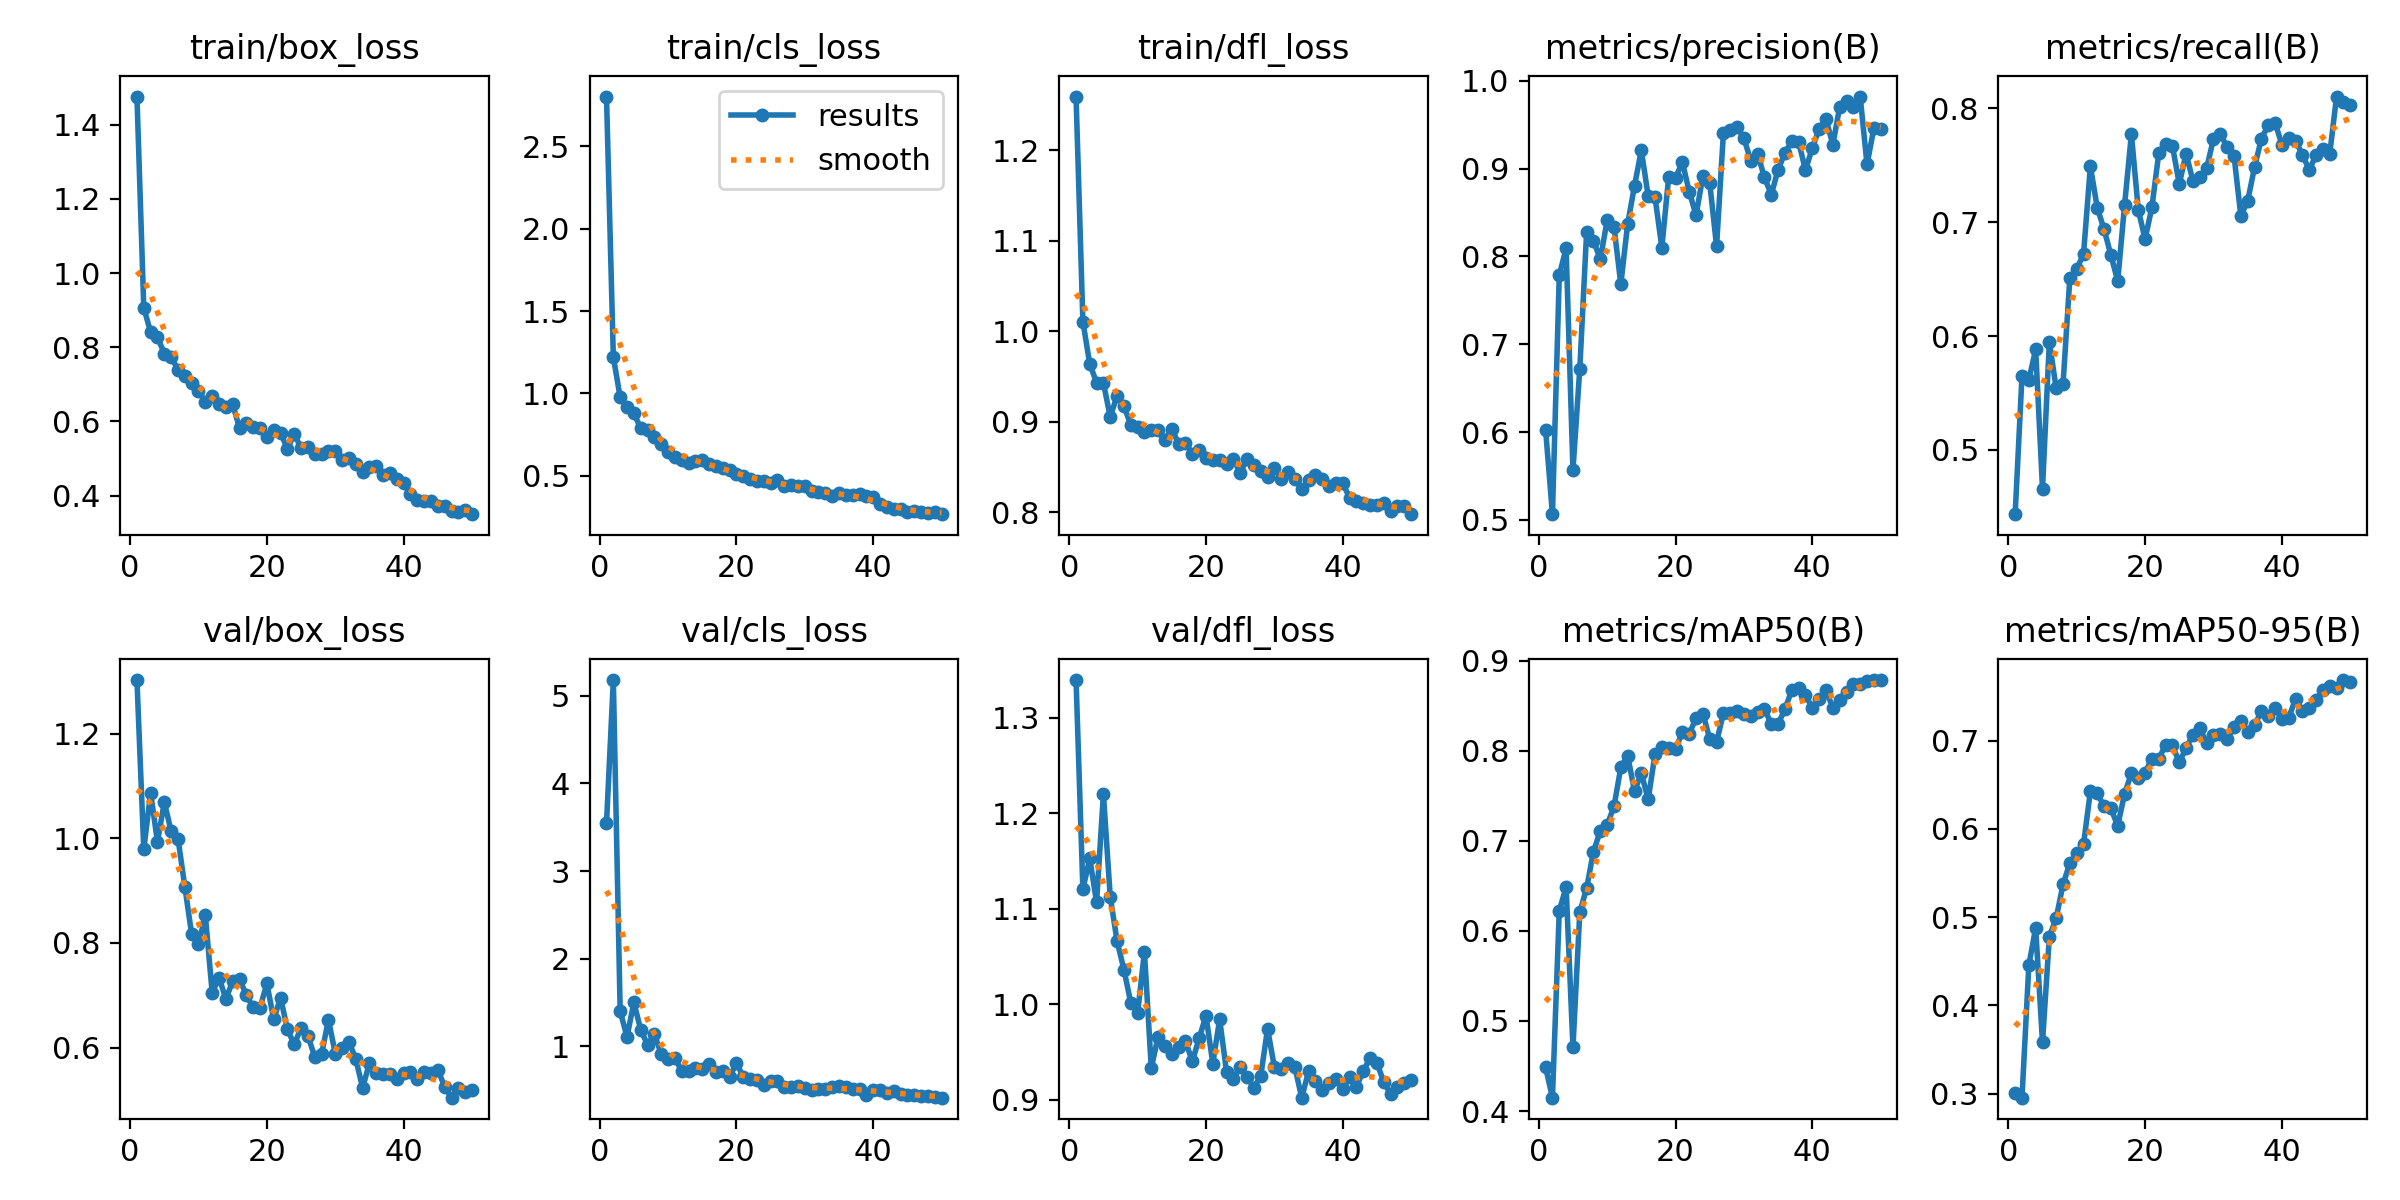

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


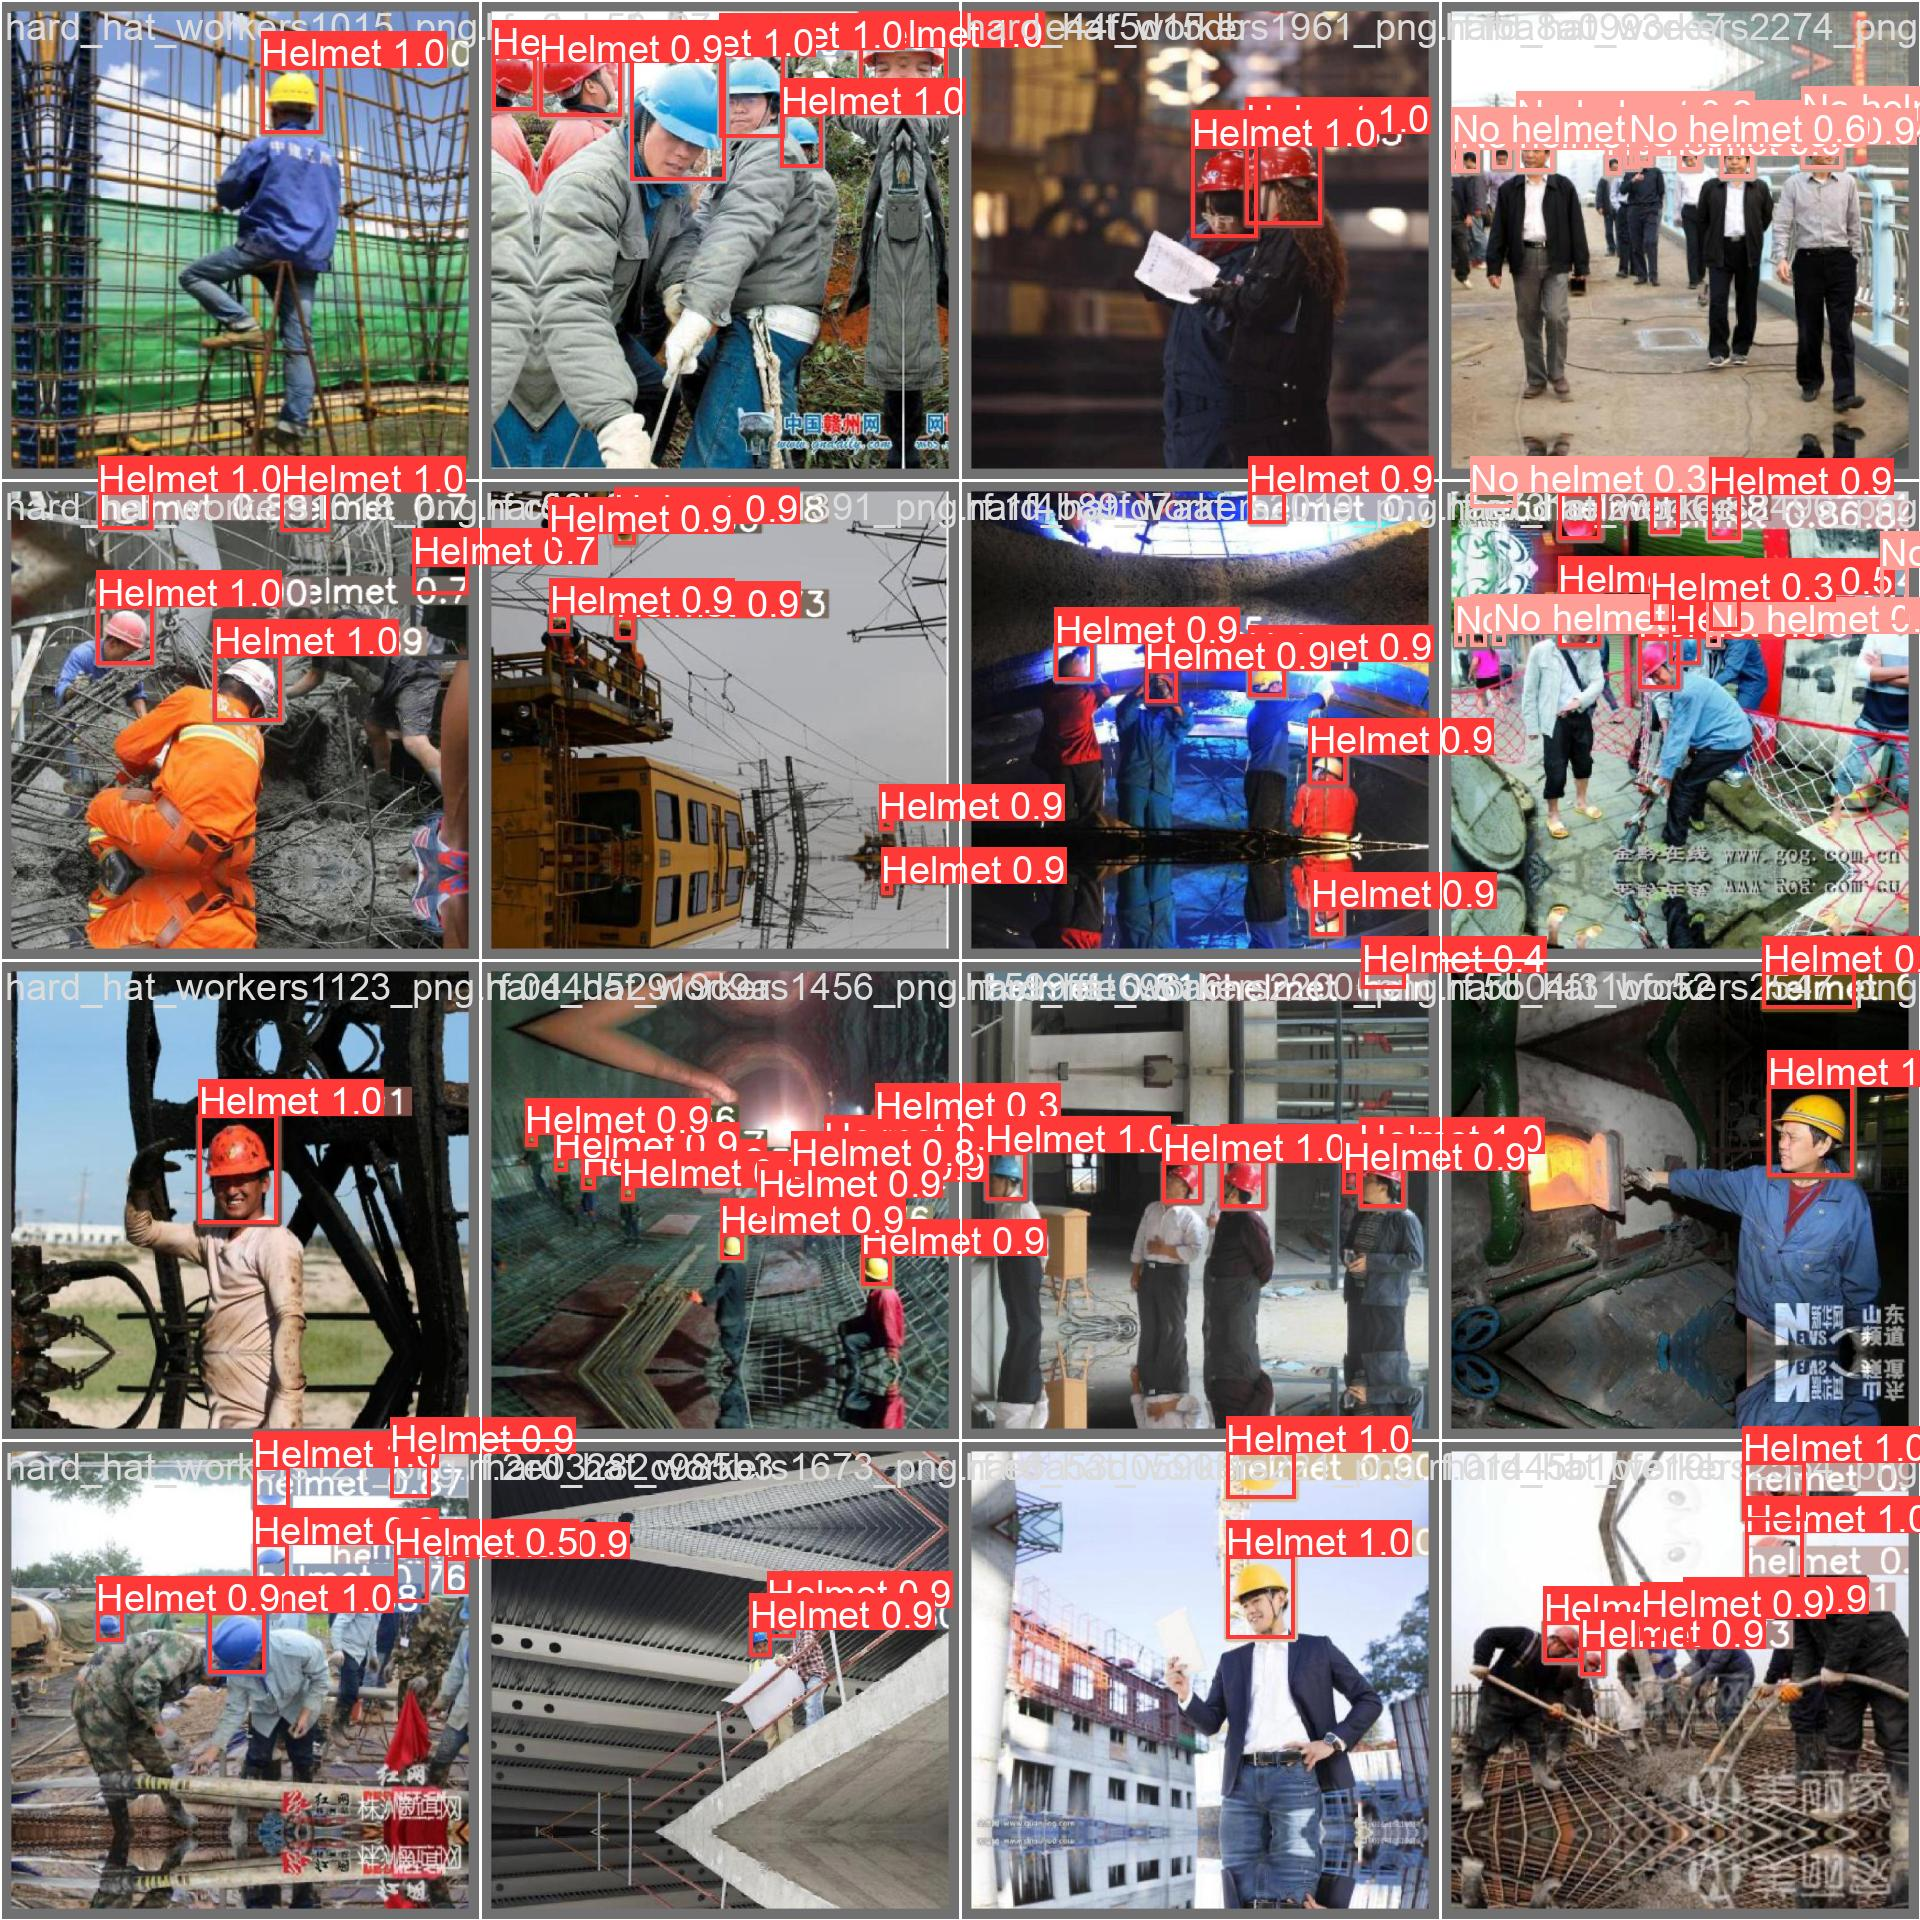

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Helmet-Detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.53s/it]
                   all         38        237      0.946      0.805      0.878      0.767
                Helmet         38        182      0.954      0.797      0.884      0.776
             No helmet         38         55      0.937      0.814      0.873      0.759
Speed: 7.9ms preprocess, 47.3ms inference, 0.0ms loss, 28.0ms

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/37 /content/datasets/Helmet-Detection-1/test/images/hard_hat_workers1072_png.rf.69436d1067786eb46de6b0959a3f32ed.jpg: 640x640 2 Helmets, 16.3ms
image 2/37 /content/datasets/Helmet-Detection-1/test/images/hard_hat_workers1095_png.rf.f9b74864695fa73531d4ea696e416a74.jpg: 640x640 8 Helmets, 16.4ms
image 3/37 /content/datasets/Helmet-Detection-1/test/images/hard_hat_workers1294_png.rf.b582364d1ba7cb15207c8acdca2eb3e1.jpg: 640x640 5 Helmets, 16.3ms
image 4/37 /content/datasets/Helmet-Detection-1/test/images/hard_hat_workers1321_png.rf.45407b198460228bdb7d063b46a7de26.jpg: 640x640 2 Helmets, 16.3ms
image 5/37 /content/datasets/Helmet-Detection-1/test/images/hard_hat_workers1348_png.rf.4025e085da8fda13d74200fae8908847.jpg: 640x640 2 Helmets, 16.3ms
image 6/37 /content